<a href="https://colab.research.google.com/github/dogukartal/IBM_AI_Labs/blob/main/Deep%20Learning%20with%20Keras%20and%20Tensorflow/Advanced%20CNNs/Image_Reconstruction_with_Transpose_Convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, UpSampling2D
import numpy as np
import matplotlib.pyplot as plt

In [2]:
input_layer = Input(shape=(32, 32, 3)) # Define the input layer
conv_layer = Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')(input_layer) # Convolution layer iwth 32 filters
transpose_conv_layer = Conv2DTranspose(filters=3, kernel_size=(3, 3), activation='sigmoid', padding='same')(conv_layer)  # Transpose Convolution Layer for reconstructing image

model = Model(inputs=input_layer, outputs=transpose_conv_layer)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [3]:
# Load CIFAR-10 dataset
(x_train, _), (x_test, _) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Train the model
model.fit(x_train, x_train, epochs=10, batch_size=32, validation_data=(x_test, x_test))

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7805 - loss: 0.5753 - val_accuracy: 0.8735 - val_loss: 0.5528
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8734 - loss: 0.5522 - val_accuracy: 0.8708 - val_loss: 0.5526
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8842 - loss: 0.5515 - val_accuracy: 0.8745 - val_loss: 0.5514
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8880 - loss: 0.5507 - val_accuracy: 0.9014 - val_loss: 0.5511
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8918 - loss: 0.5506 - val_accuracy: 0.8722 - val_loss: 0.5509
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8961 - loss: 0.5501 - val_accuracy: 0.8917 - val_loss: 0.5508
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9007 - loss: 0.5502 - val_accuracy: 0.8928 - val_loss: 0.5508
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


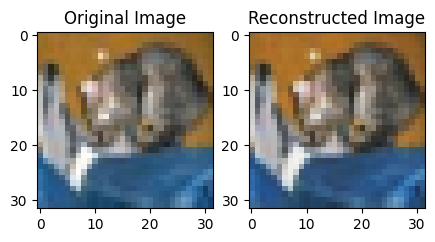

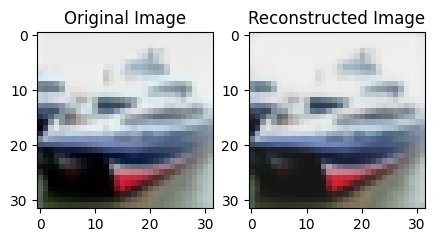

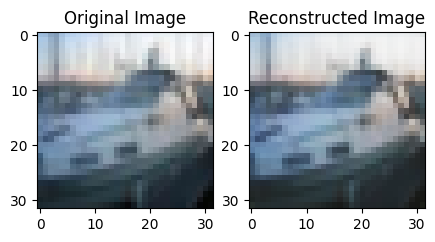

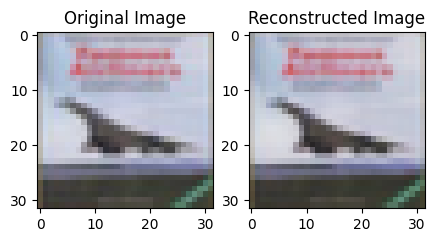

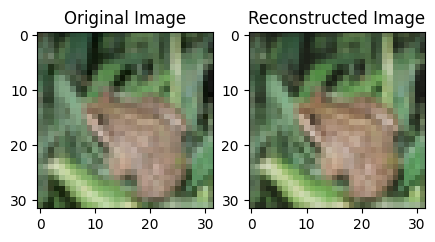

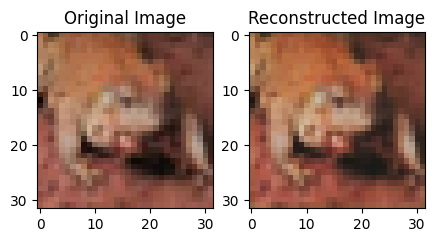

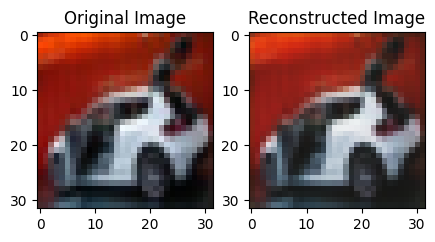

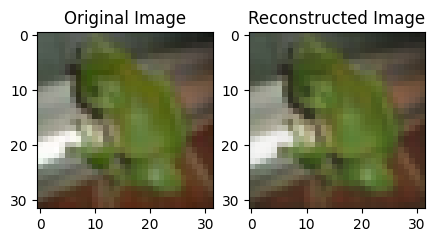

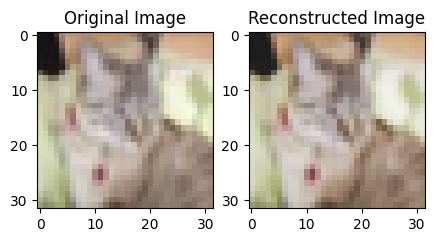

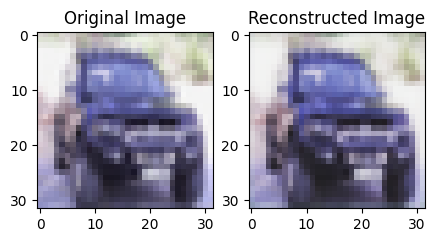

In [4]:
# Reconstruct some images from the test set
reconstructed_images = model.predict(x_test[:10])

# Display the original and reconstructed images
for i in range(10):
  plt.figure(figsize=(5, 5))
  plt.subplot(1, 2, 1)
  plt.imshow(x_test[i])
  plt.title("Original Image")
  plt.subplot(1, 2, 2)
  plt.imshow(reconstructed_images[i])
  plt.title("Reconstructed Image")
  plt.show()

In [8]:
loss, accuracy = model.evaluate(reconstructed_images, x_test[:10])
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step - accuracy: 0.8999 - loss: 0.5591
Test loss: 0.5591194033622742
Test accuracy: 0.89990234375


In [10]:
from tensorflow.keras.layers import Dropout

# Deepen the network with different kernel sizes
input_layer = Input(shape=(32, 32, 3))
conv_layer1 = Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')(input_layer)
conv_layer1 = Dropout(0.2)(conv_layer1) # Add dropout layer
conv_layer2 = Conv2D(filters=64, kernel_size=(5, 5), activation='relu', padding='same')(conv_layer1)
conv_layer2 = Dropout(0.3)(conv_layer2) # Add dropout layer
conv_layer3 = Conv2D(filters=128, kernel_size=(7, 7), activation='relu', padding='same')(conv_layer2)
conv_layer3 = Dropout(0.4)(conv_layer3) # Add dropout layer
transpose_conv_layer1 = Conv2DTranspose(filters=64, kernel_size=(7, 7), activation='relu', padding='same')(conv_layer3)
transpose_conv_layer2 = Conv2DTranspose(filters=32, kernel_size=(5, 5), activation='relu', padding='same')(transpose_conv_layer1)
transpose_conv_layer3 = Conv2DTranspose(filters=3, kernel_size=(3, 3), activation='sigmoid', padding='same')(transpose_conv_layer2)

model = Model(inputs=input_layer, outputs=transpose_conv_layer3)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
(x_train, _), (x_test, _) = tf.keras.datasets.cifar10.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

model.fit(x_train, x_train, epochs=10, batch_size=32, validation_data=(x_test, x_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.6710 - loss: 0.5757 - val_accuracy: 0.8500 - val_loss: 0.5500
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8103 - loss: 0.5513 - val_accuracy: 0.8559 - val_loss: 0.5504
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8177 - loss: 0.5507 - val_accuracy: 0.8607 - val_loss: 0.5508
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8251 - loss: 0.5499 - val_accuracy: 0.8486 - val_loss: 0.5493
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8256 - loss: 0.5492 - val_accuracy: 0.8675 - val_loss: 0.5492
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8294 - loss: 0.5496 - val_accuracy: 0.8698 - val_loss: 0.5494
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8335 - loss: 0.5489 - val_accuracy: 0.8701 - val_loss: 0.5498
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8370 - loss: 0.5491 -